# Genetic Algorithm Exercise

In [3]:
import random
from mpl_toolkits import mplot3d
from matplotlib import pyplot as plt
import numpy as np
import math
import copy
from collections import defaultdict
from timeit import timeit
import time

%matplotlib inline

Minimise the the following functions:

In [4]:
def f1(x):
    return np.power(x, 2)
def f2(x, y):
    return 20 + f2_(x) + f2_(y)
def f2_(x):
    return x**2 - 10*np.cos(2*3.14*x)
def f3(x):
#     x += 4 
    x = np.multiply(x, 7/100)
    return .1*np.power(x, 4) - 5*np.power(x, 2) + np.multiply(x, 5)

In [5]:
np.multiply([5,6,7],5)

array([25, 30, 35])

<function matplotlib.pyplot.show(close=None, block=None)>

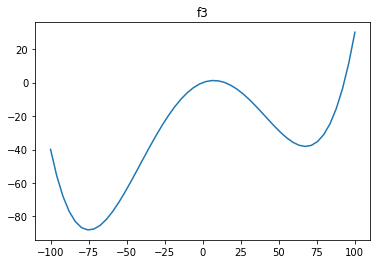

In [6]:
x = np.linspace(-100, 100)
plt.plot(x, f3(x))
plt.title("f3")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

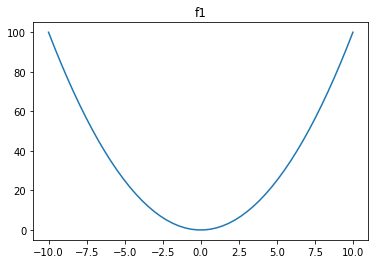

In [5]:
x = np.linspace(-10, 10)
plt.plot(x, f1(x))
plt.title("f1")
plt.show

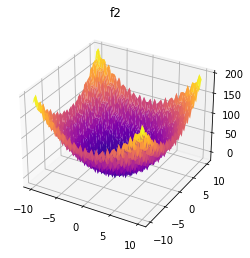

In [6]:
space = np.linspace(-10, 10)
x, y = np.meshgrid(space, space)
z = f2_(x) + f2_(y)

fig = plt.figure()
 
# syntax for 3-D plotting
ax = plt.axes(projection ='3d')
 
# syntax for plotting
ax.plot_surface(x, y, z, cmap='plasma')
ax.set_title('f2')
plt.show()

In [7]:
## generate children and add to population
def spawn_nextgen(N, birthrate = 10, variance = .1):
    N2 = copy.deepcopy(N)
    for n in N:
        N2 += [n+random.gauss(0,variance) for x in range(birthrate)]
    return N2

In [8]:
def show_x_fitness(x, f):
    plt.scatter(x, f(x))


In [9]:
def select(N, f, pop):
    ordered = sorted(N, key=f)
    return ordered[:pop]

In [12]:
def sim_loss_epochs_T(n, f, samples, epochs = 25):
    converge = defaultdict(lambda : 0)
    for i in range (samples):
        N = [random.uniform(-10, 10) for _ in range(n)]
        Avg_fitness = [100,101]
        while int(Avg_fitness[-1]) != int(Avg_fitness[-2]):
#         for i in range(epochs):
            Avg_fitness += [np.average(f(N))]
            nextgen = spawn_nextgen(N)
            N = select(nextgen, f, n)
        plt.plot(Avg_fitness)
        final = int(Avg_fitness[-1])//240
        converge[final] += 1
    print("convergence to each minima: ", converge)

In [14]:
def sim_loss_epochs_E(n, f, samples, epochs = 25):
    converge = defaultdict(lambda : 0)
    for i in range (samples):
        N = [random.uniform(-10, 10) for _ in range(n)]
        Avg_fitness = [] #[100,101]
        while N:
#         for i in range(epochs):
            Avg_fitness += [np.average(f(N))]
            nextgen = spawn_nextgen(N)
#             Avg_fitness += [np.average(f(nextgen))]
            N = select(nextgen, f, len(N)//2)
#             show_x_fitness(N, f3)
#             plt.show()
        plt.plot(Avg_fitness)
        final = int(Avg_fitness[-1])//240
        converge[final] += 1
    print("convergence to each minima: ", converge)

In [15]:
# N = [random.uniform(-10, 10) for _ in range(100)]
# Avg_fitness = [100,101]
# for i in range(10):
#     nextgen = spawn_nextgen(N)
#     Avg_fitness += [sum(f3(nextgen))/len(nextgen)]
#     N = select(nextgen, f3, len(N)//2)
#     show_x_fitness(N, f3)
#     plt.show()
# # plt.plot(Avg_fitness)

convergence to each minima:  defaultdict(<function sim_loss_epochs_E.<locals>.<lambda> at 0x2b1d37b408b0>, {-2: 100})


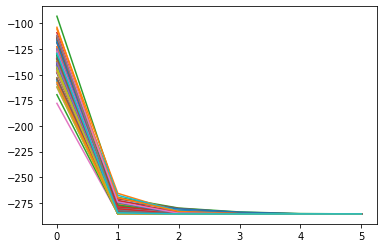

In [16]:
sim_loss_epochs_E(50, f3, 100, epochs=10)

convergence to each minima:  defaultdict(<function sim_loss_epochs_T.<locals>.<lambda> at 0x2b1d38156e50>, {-2: 88, -1: 12})


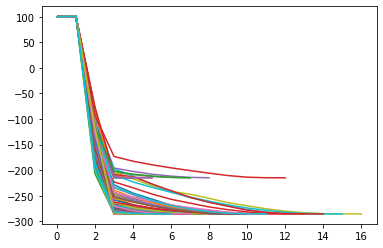

In [17]:
sim_loss_epochs_T(10, f3, 100)

In [26]:
def T_epoch(N, f, n):
    nextgen = spawn_nextgen(N, variance=2)
    Avg_fitness = [np.average(f(nextgen))]
    N = select(nextgen, f, n)
    return N, Avg_fitness

def sim_loss_epochs_T_timed(n, f, samples, epochs = 25):
    converge = defaultdict(lambda : 0)
    num_epochs = []
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,6))
    
    for i in range (samples):
        N = [random.uniform(-100, 100) for _ in range(n)]
        Avg_fitness = [100,101]
        epoch_times = [0]
        
        while int(Avg_fitness[-1]) != int(Avg_fitness[-2]):
#             epoch_times += [timeit('T_epoch(N, f, n)')]
            epoch_start = time.process_time() 
            N, A= T_epoch(N , f, n)
            epoch_end = time.process_time()
            epoch_times += [epoch_end - epoch_start]
            Avg_fitness += A
            
        final = int(Avg_fitness[-1])//1
        converge[final] += 1
        num_epochs += [len(Avg_fitness)]
        plt.subplot(2,2,1) 
        plt.plot(Avg_fitness)
        plt.subplot(2,2,2) 
        plt.plot(epoch_times)
        plt.subplot(2,2,4) 
        plt.plot(np.cumsum(epoch_times))

    plt.subplot(2,2,3) 
    plt.hist(num_epochs)
    print("convergence to each minima: ", converge)

convergence to each minima:  defaultdict(<function sim_loss_epochs_T_timed.<locals>.<lambda> at 0x2b2ac2546c10>, {-38: 33, -37: 67})


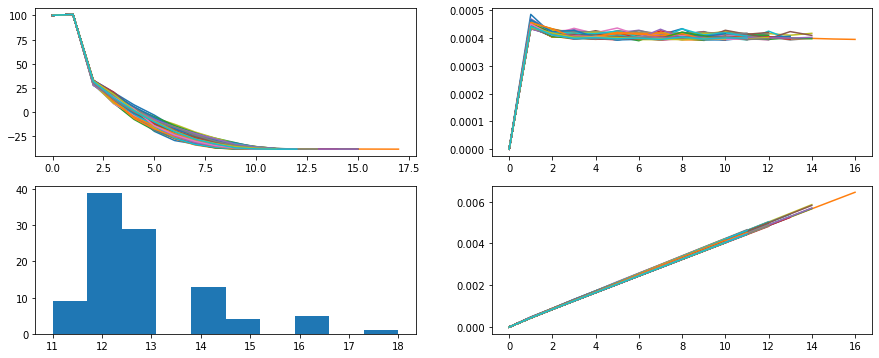

In [27]:
sim_loss_epochs_T_timed(5, f3, 100)

In [28]:
def E_epoch(N, f, n):
    nextgen = spawn_nextgen(N)
    Avg_fitness = [np.average(f(nextgen))]
    N = select(nextgen, f, len(N)//2)
    return N, Avg_fitness

def sim_loss_epochs_E_timed(n, f, samples, epochs = 25):
    
    converge = defaultdict(lambda : 0)
    num_epochs = []
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,5))
    
    for i in range (samples):
        N = [random.uniform(-100, 100) for _ in range(n)]
        Avg_fitness = []
        epoch_times = []
        
        while len(N) > 1: # and (abs(Avg_fitness[-1] - Avg_fitness[-2]) < 1) if len(Avg_fitness)>2 else True:
            epoch_start = time.process_time() 
            N, A= E_epoch(N , f, n)
            epoch_end = time.process_time()
            epoch_times += [epoch_end - epoch_start]
            Avg_fitness += A
            
        final = int(Avg_fitness[-1])//1
        converge[final] += 1
        num_epochs += [len(Avg_fitness)]
        plt.subplot(2,2,1) 
        plt.plot(Avg_fitness)
        plt.subplot(2,2,2) 
        plt.plot(epoch_times)
        plt.subplot(2,2,4) 
        plt.plot(np.cumsum(epoch_times))
        
    plt.subplot(2,2,3) 
    plt.hist(num_epochs)
    print("convergence to each minima: ", converge)

convergence to each minima:  defaultdict(<function sim_loss_epochs_E_timed.<locals>.<lambda> at 0x2b2ac2883f70>, {-88: 94, -87: 6})


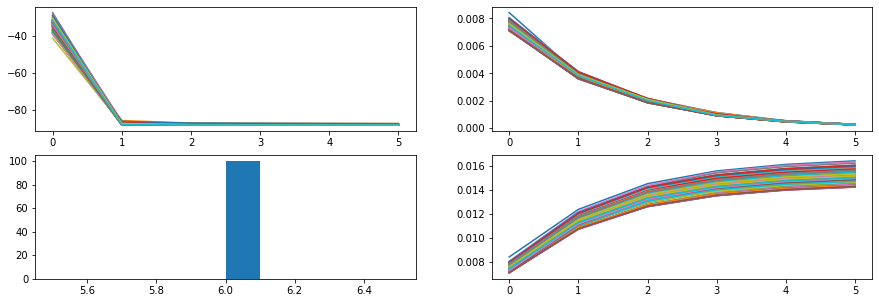

In [29]:
sim_loss_epochs_E_timed(100, f3, 100)

## Paper outlining this comparison:
https://www.researchgate.net/publication/225208838_Genetic_algorithms_with_shrinking_population_size

## Traditional Approach
* Static compute time for each epoch
* Convergence time depends on how difficult it is to find the local minima

## Other Approach
* Compute time is halved for each epoch
* Convergence is determined by size of initial population

In [112]:
# def T_epoch(N, f, n):
#     nextgen = spawn_nextgen(N)
#     Avg_fitness = [np.average(f(nextgen))]
#     N = select(nextgen, f, n)
#     return N, Avg_fitness

# def E_epoch(N, f, n):
#     nextgen = spawn_nextgen(N)
#     Avg_fitness = [np.average(f(nextgen))]
#     N = select(nextgen, f, len(N)//2)
#     return N, Avg_fitness

# def sim_loss_epochs(n, f, samples, epochs = 25):
#     converge = defaultdict(lambda : 0)
#     for i in range (samples):
#         N = [random.uniform(-10, 10) for _ in range(n)]
#         Avg_fitness = []
#         epoch_times = [0]
#         while len(N) > 1:
# #             epoch_times += [timeit('T_epoch(N, f, n)')]
#             epoch_start = time.process_time() 
#             N, A= E_epoch(N , f, n)
#             epoch_end = time.process_time()
#             epoch_times += [epoch_end - epoch_start + epoch_times[-1]]
#             Avg_fitness += A
#         final = int(Avg_fitness[-1])//240
#         converge[final] += 1
#         plt.plot(epoch_times)
# #         plt.plot(Avg_fitness)
#     print("convergence to each minima: ", converge)

In [23]:
class blip:
    def __init__(self, _x, _y):
        self.x = _x
        self.y = _y
#         self.z = _z
        self.sigma = 2
    def z(self):
        return f2(self.x, self.y)

In [24]:
## Initialize population
n = 50
# random.uniform(-10, 10)
# for _ in range(n):
    

N = [blip(random.uniform(-10, 10), random.uniform(-10, 10)) for _ in range(n)]
N

In [25]:
## generate children and add to population
birthrate = 20
variance = .1

def spawn_nextgen_f2(N):
    N2 = copy.deepcopy(N)
    for n in N:
        for _ in range(birthrate):
            baby = copy.deepcopy(n)
            baby.sigma+= random.gauss(0,variance)
            baby.x += random.gauss(0,baby.sigma)
            baby.y += random.gauss(0,baby.sigma)
            N2 += [baby]
    return N2

In [26]:
def show_f2_fitness(N):
    x = [b.x for b in N]
    y = [b.x for b in N]
    z = [b.z() for b in N]
#     z = [b.x for b in N]
    fig = plt.figure()
    # syntax for 3-D plotting
    ax = plt.axes(projection ='3d')
    # syntax for plotting
    ax.scatter(x, y, z, cmap='plasma')
    ax.set_title('f2')
    plt.show()

In [29]:
def f2_blip(blip):
    return blip.z()
def select_f2(N):
    ordered = sorted(N, key=f2_blip)
    return ordered[:n]

In [35]:
for i in range(500):
    nextgen = spawn_nextgen_f2(N)
    N = select_f2(nextgen)
#     show_f2_fitness(N)

In [36]:
(np.array([b.sigma for b in N]) > 2).sum() / len(N)

0.18

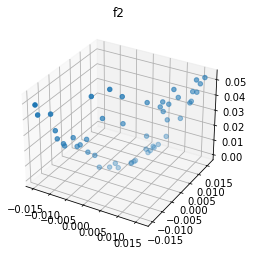

In [37]:
show_f2_fitness(N)

In [38]:
[b.sigma for b in N]

[0.8293104500986713,
 1.3152432487818126,
 1.3608201853447934,
 1.6671190394589581,
 1.727564316194641,
 2.0998184846598558,
 1.7829637500269775,
 2.033141547705763,
 1.6869976245155793,
 2.024510106527763,
 1.6848910679509321,
 1.990135116409751,
 1.9224367076592128,
 2.1743762898455894,
 1.5819727631194445,
 1.321525708247895,
 1.6857818885612108,
 1.308458703363152,
 2.065716588567701,
 2.084008337156999,
 1.0392983115104812,
 1.0321469350342922,
 1.761660609757978,
 1.7683116387924178,
 1.8471120663776874,
 0.6897172869274543,
 1.372678506746948,
 1.8836504384388173,
 1.0768147446977354,
 1.6888490904583766,
 1.394783924654625,
 1.7406337619359264,
 1.6861543858311006,
 1.4406518446138146,
 1.2404991777890435,
 1.3558273168456738,
 1.972059809807633,
 1.8443811430615684,
 1.0745857267556047,
 1.3818427608070016,
 1.6376895213839384,
 2.087507724655886,
 1.7551979499082777,
 2.1082343106280397,
 1.5630574196934046,
 1.1778446148029307,
 1.6307259443833961,
 2.209777156724258,
 1.528

In [39]:
a = [1,2,3]
b = [

[[1, 2, 3], [4, 5]]